# Medical Health Insurance Cost Prediction
Medical Health Insurance Cost Prediction with python using linear and random forest Regression Models.

# Overview

This project focuses on predicting medical health insurance costs using various regression models. The goal is to create a model that can accurately estimate the insurance costs for individuals based on their attributes. The project employs exploratory data analysis, data preprocessing, and several regression techniques to achieve this.

# Project Description

In this project, we aim to predict medical health insurance costs for individuals based on various factors such as age, sex, BMI, number of children, smoking habits, and region. The project involves the following steps:

Data Loading and Overview: The project begins by loading the dataset containing information about individuals and their insurance costs.

Exploratory Data Analysis: We analyze the dataset to gain insights into the data distribution, relationships between variables, and identify potential patterns.

Data Preprocessing: Data preprocessing steps are performed, including handling missing values, encoding categorical variables, and scaling numerical features.

Regression Models: Several regression models are implemented, including Multiple Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regressor, Random Forest Regressor, and Polynomial Regression.

Model Evaluation: The models are evaluated using metrics such as Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error. The performance of each model is compared.

Conclusion: The project concludes with a summary of key insights obtained from the analysis and suggestions for further improvement.

# Requirements

## Python

Integrated Development Environment (IDE): You can use IDEs like Jupyter Notebook, PyCharm, Visual Studio Code, or any other of your preference but I'm using Google colab.

Dataset: Collect the dataset containing medical records, including factors like age, gender, BMI, number of dependents, smoking status, region, and charges.

Data Preprocessing Libraries: You might need libraries like Pandas for data manipulation and cleaning, and NumPy for numerical operations.

Data Visualization Libraries: Consider using libraries like Matplotlib and Seaborn for visualizing the data distribution, trends, and anomalies.

Statistical Libraries: Depending on your project's needs, Scipy might be useful for advanced statistical operations.

Machine Learning Libraries: You will likely need Scikit-learn for standard machine learning algorithms

Regression Algorithms: Implementing a project on insurance cost prediction will require a variety of regression algorithms such as Linear Regression,  Decision Tree Regression, Random Forest Regression, and possibly more advanced techniques based on your research.

Model Evaluation Tools: Libraries like Scikit-learn contain useful functions for evaluating your regression models, including metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
data = pd.read_csv('/content/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Preprocessing

In [155]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [156]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [157]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [158]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [159]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA

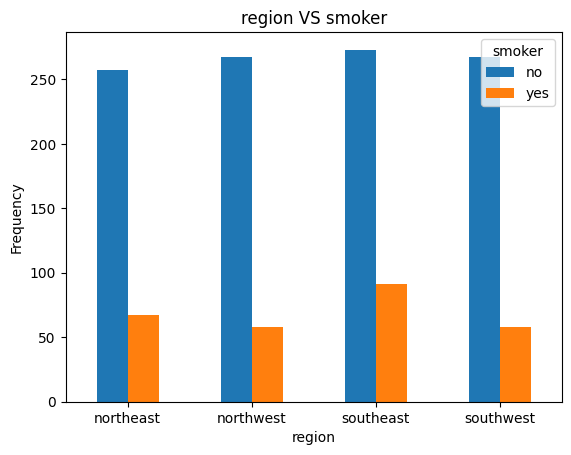

In [160]:
pd.crosstab(data['region'],data['smoker']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('region VS smoker')
plt.xticks(rotation=0);

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


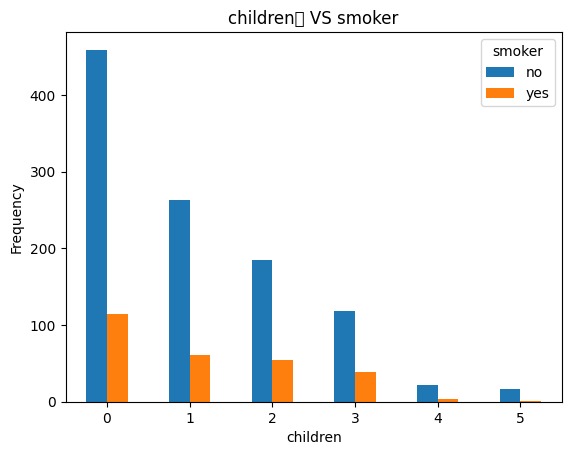

In [161]:
pd.crosstab(data['children'],data['smoker']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('children	 VS smoker')
plt.xticks(rotation=0);

<Axes: xlabel='region', ylabel='charges'>

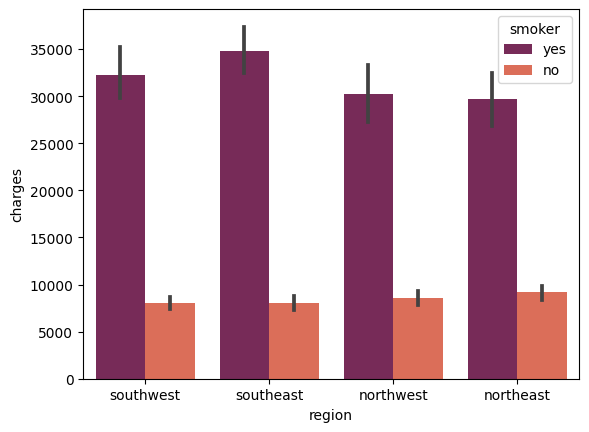

In [162]:
sns.barplot(data = data, x = 'region', y = 'charges', hue = 'smoker', palette = 'rocket' )

<Axes: xlabel='children', ylabel='charges'>

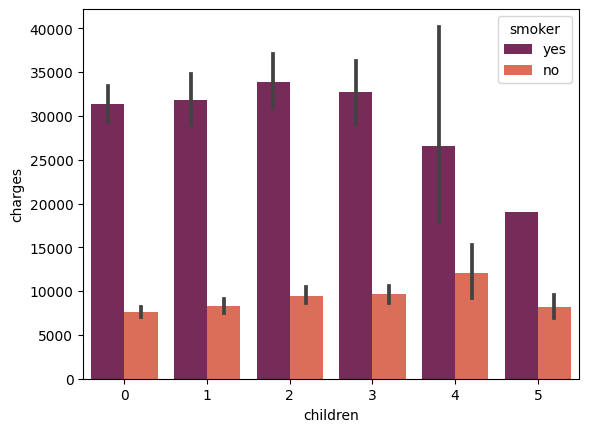

In [163]:
sns.barplot(data = data, x = 'children', y = 'charges', hue = 'smoker', palette = 'rocket' )

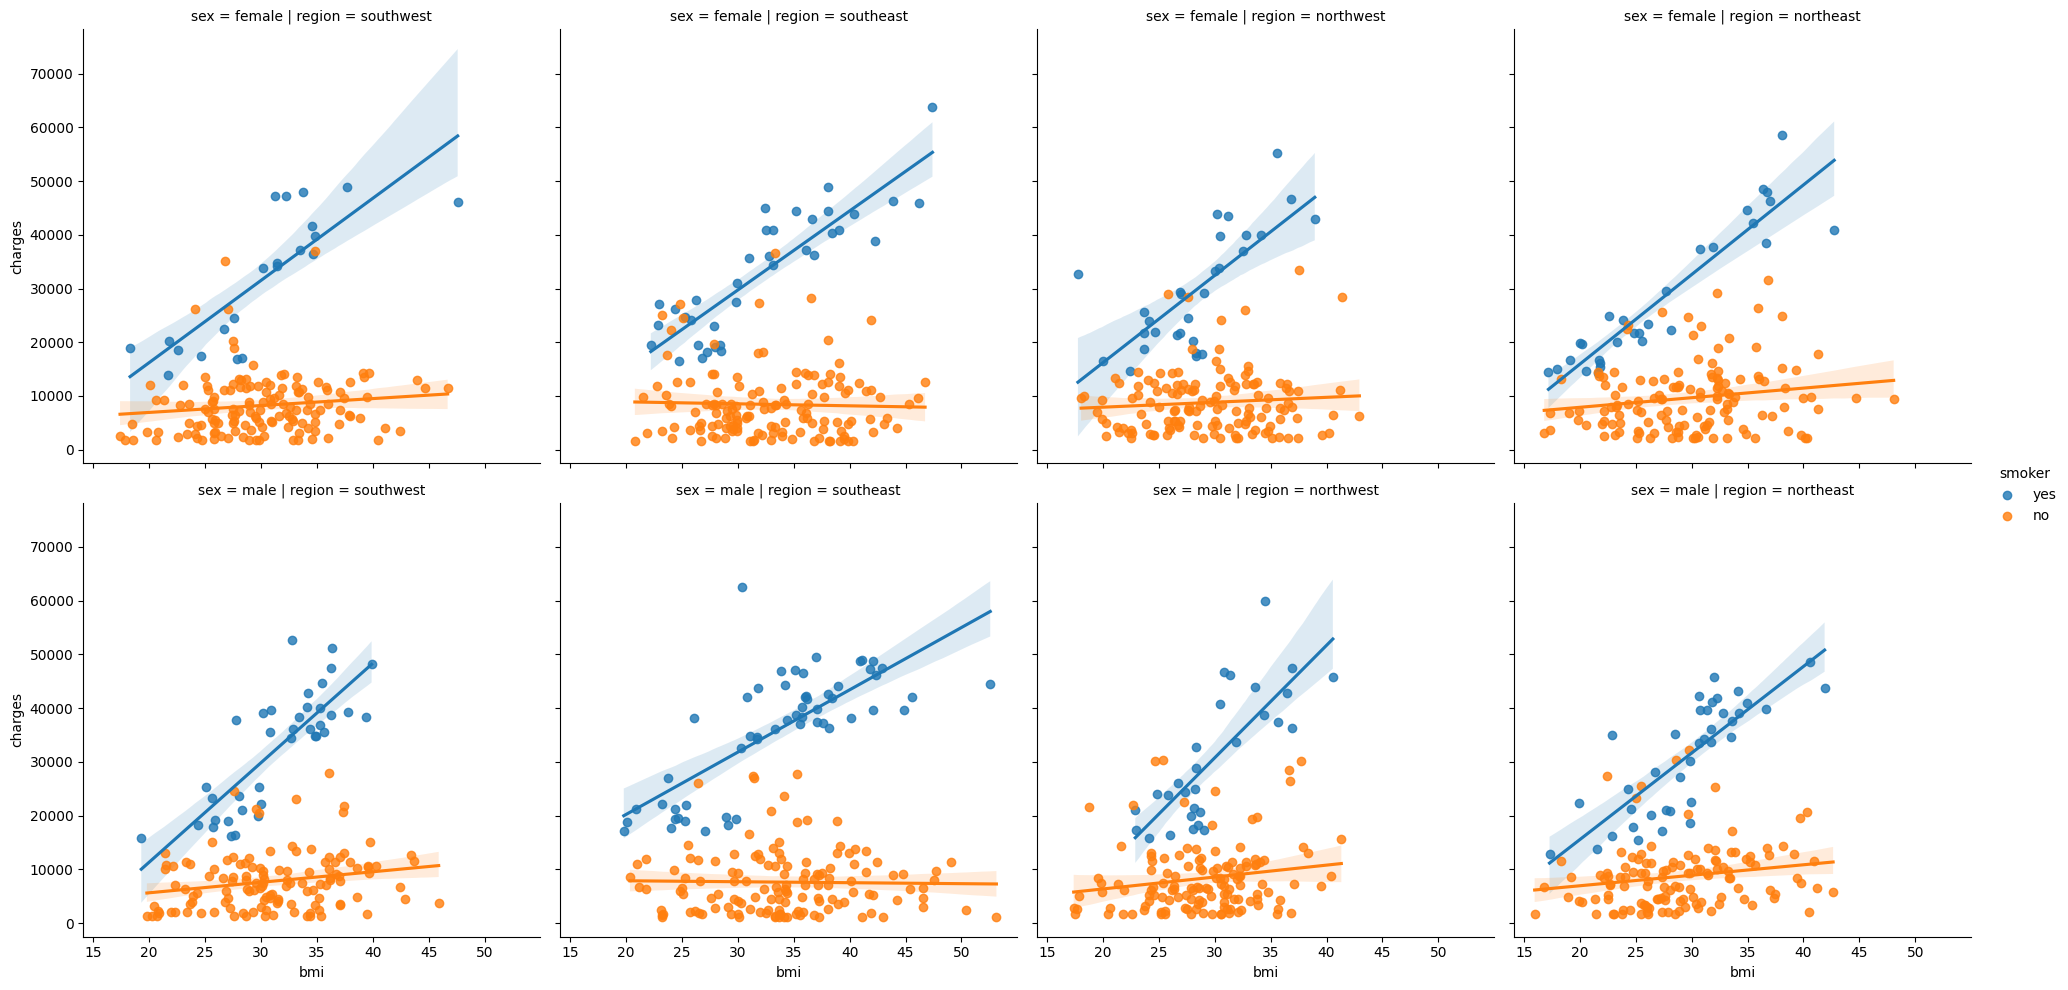

In [164]:
#regression plot to understand the relationship between the bmi and charges considering
sns.lmplot(x = "bmi", y = "charges", row = "sex", col = "region", hue = 'smoker', data = data)

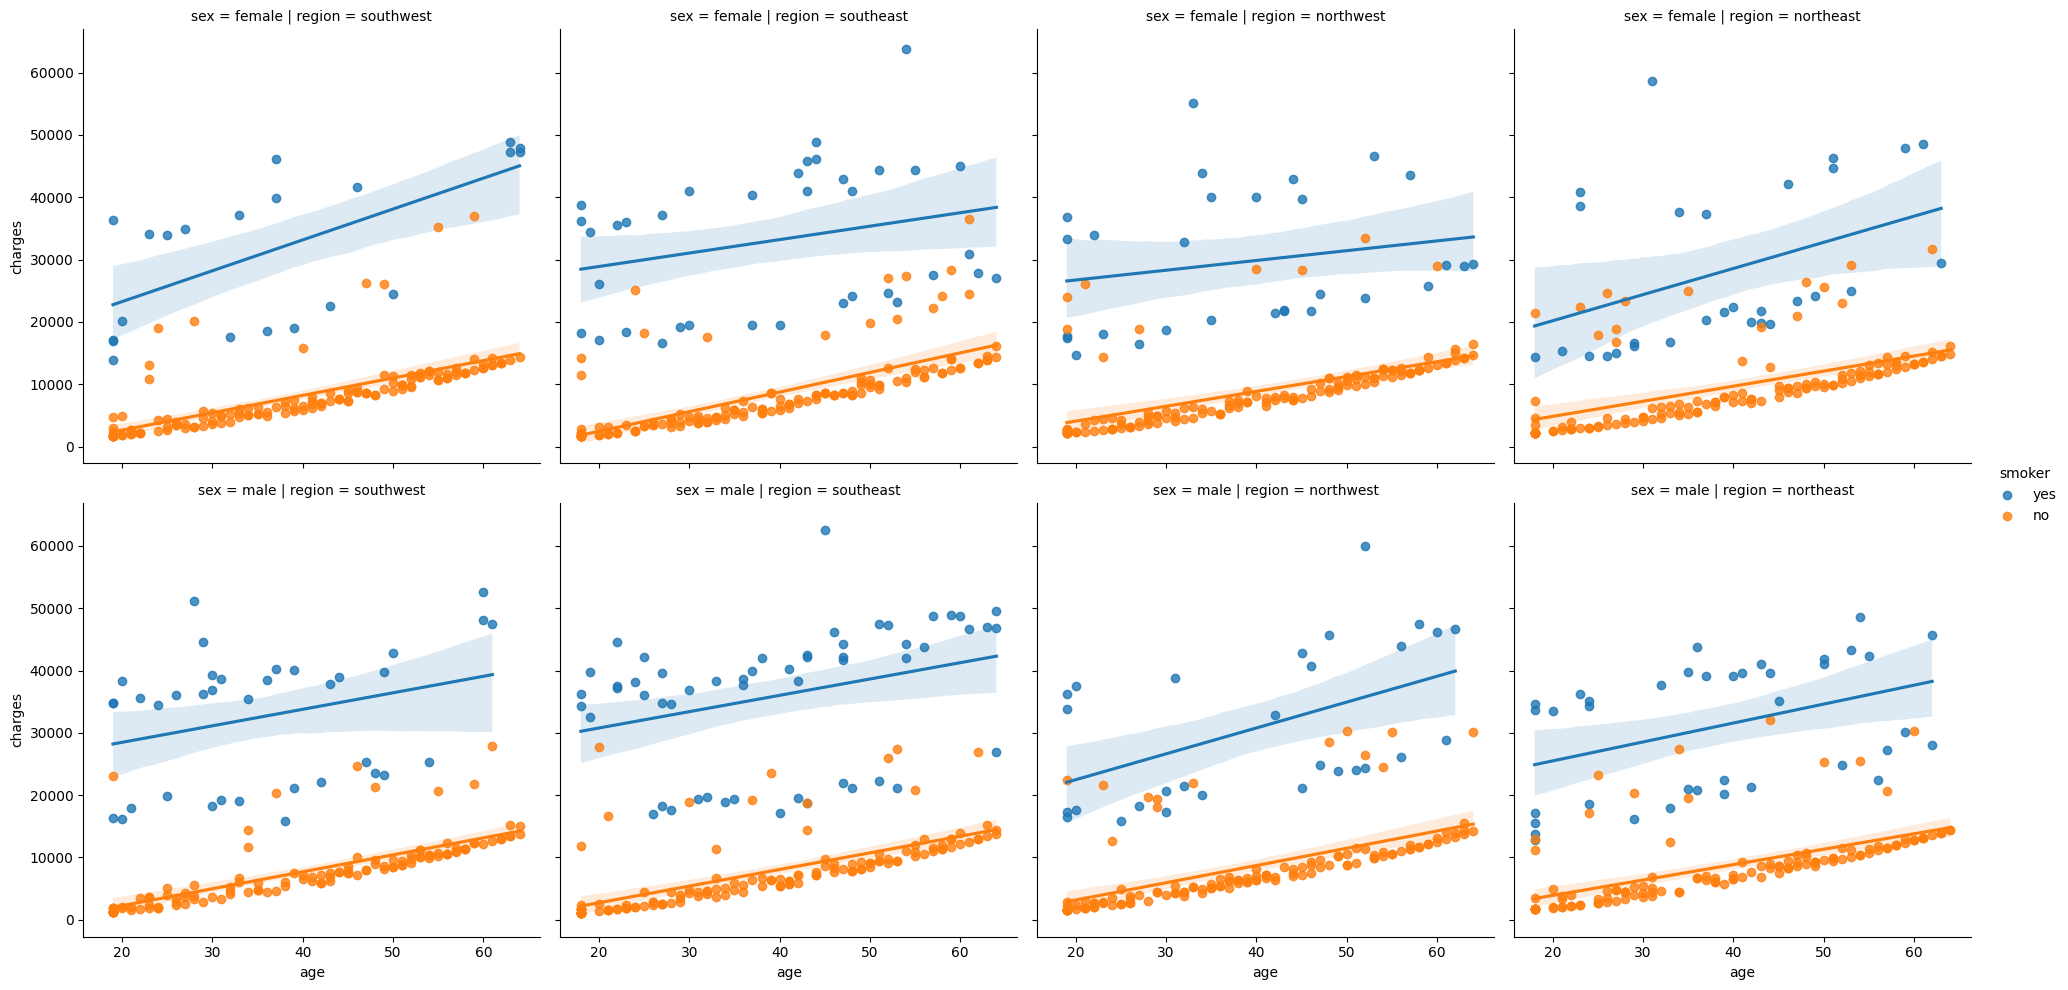

In [165]:
#regression plot to understand the relationship between the Age and Charges considering
sns.lmplot(x = "age", y = "charges", row = "sex", col = "region", hue = 'smoker', data = data)

From the chart above we can see that those who are smokers get a higher medical insurance charges than those that are none smoker

In [166]:
df=data.select_dtypes(["int64","float64"])

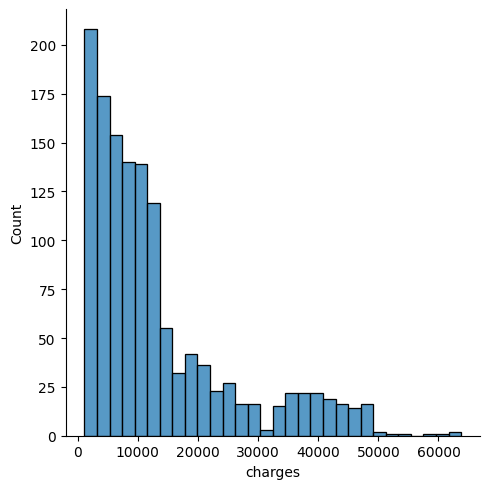

In [167]:


skewed = sns.displot(df['charges'])
skewed


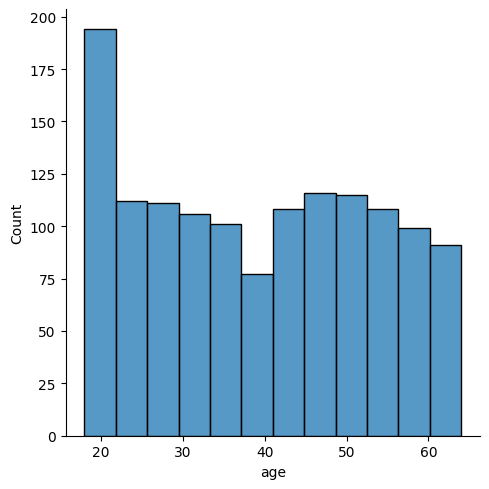

In [168]:
skewed = sns.displot(df['age'])
skewed

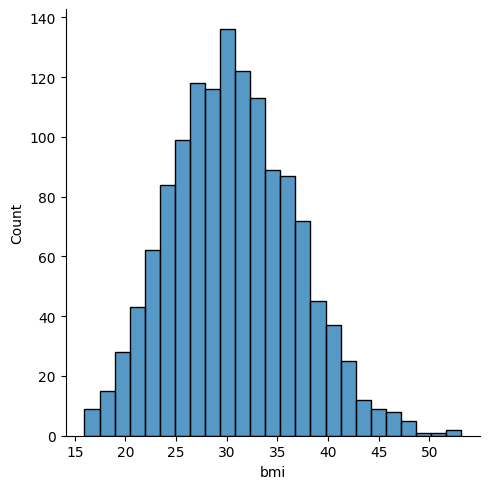

In [169]:
skewed = sns.displot(df['bmi'])

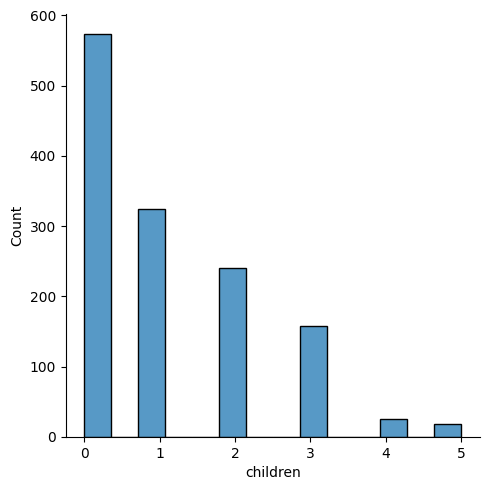

In [170]:
skewed = sns.displot(df['children']) #Charges is right-skewed
skewed

<ipython-input-171-0518d43dfd9f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='coolwarm',annot=True)


<Axes: >

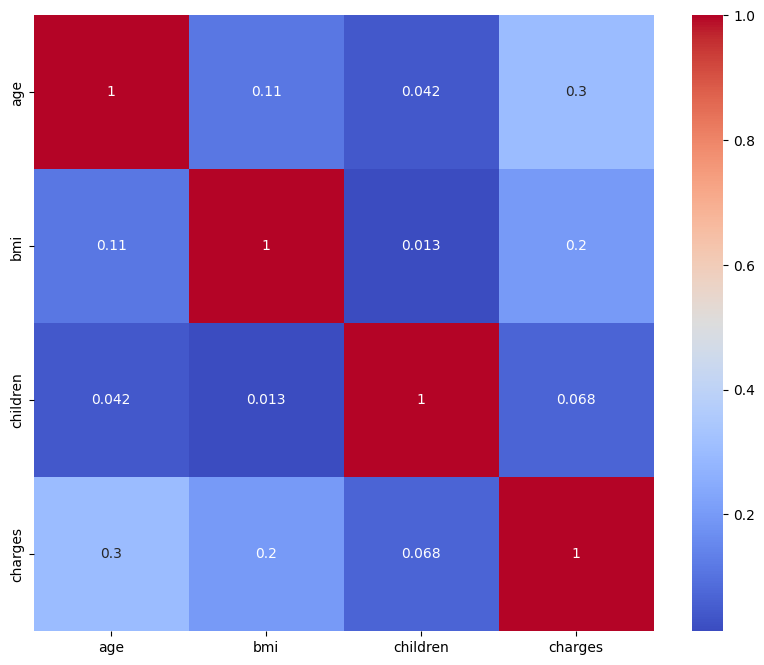

In [171]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [172]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# ENCODE

In [173]:
#data['sex'] = data['sex'].map({'male':0,'female':1})
#data['smoker'] = data['somker'].map({'no':0,'yes':1})
data['sex'] = data['sex'].replace(['male','female'],[0,1])
data['smoker'] = data['smoker'].replace(['no','yes'],[0,1])

In [174]:
data = pd.get_dummies(data, columns = ['region'])

In [175]:
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [176]:
x = data.drop(['charges'], axis = 1)
y = data['charges']

# Split Train & Test

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Linear Regression

In [178]:

from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(x_train,y_train) #fit - all magic
print(linear_model.predict(x_test))     #predict
print(y_test)

[ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656 10864.11316424   170.28084137 16903.45028662
  1092.43093614 11218.34318352 28101.68455267  9377.73460205
  5263.0595179  38416.04221107 40255.82339284 37098.25353123
 15240.39392306 35912.88264434  9112.52398703 31461.92108909
  3847.68845883 10130.12001517  2370.54189389  7140.21550828
 11301.76782638 12961.65366224 14509.47251876  6159.8976107
  9963.85857263  2177.85718217  9115.93673493 13073.68932159
  4561.82376202  3408.20756033  4459.81359745 13032.06505076
  1979.99357292  8813.28303302 33271.29124448 32585.51583927
  3908.76090964  4326.10774721 14142.81326533 11423.45494846
  8774.13955311 12097.28051001  5281.57353499  3150.5596042
 35494.46461214  9150.1124786  15836.84575621  2343.57470069
 12364.78414194  1482.29488266 13389.06105161 12573.57395972
  4341.83680558 32165.33688042 13321.3360032  12896.82071102
 14167.99421483 10506.17623512 16360.78543548  7763.89824584
 11839.25019431  4061.1975

In [179]:
print('Intercept', linear_model.intercept_)
print('Coefficient', linear_model.coef_)
print('Score', linear_model.score(x_test, y_test))

Intercept -12409.395986211302
Coefficient [ 2.56975706e+02  1.85916916e+01  3.37092552e+02  4.25278784e+02
  2.36511289e+04  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02]
Score 0.7835929767120723


In [180]:
y_pred = linear_model.predict(x_test)
y_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

<ipython-input-181-9dd94f012e77>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-181-9dd94f012e77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , 

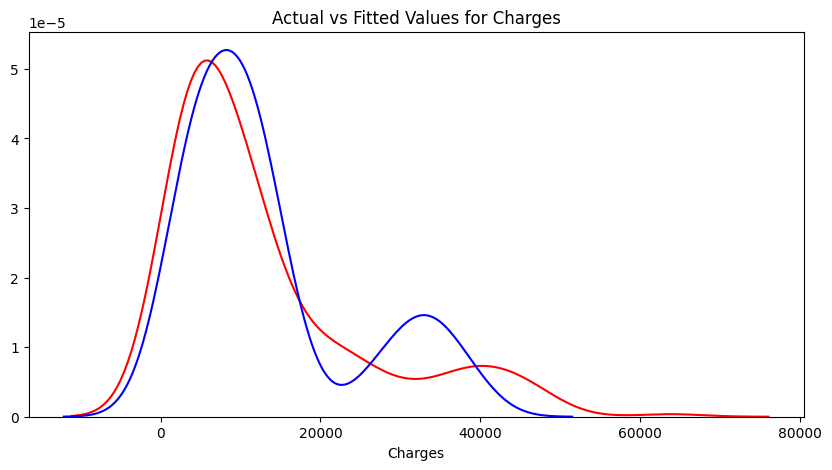

In [181]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

In [182]:
predicted1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted1.head()

,Actual,Predicted
764,9095.06825,8969.550274
887,5272.17580,7068.747443
890,29330.98315,36858.410912
1293,9301.89355,9454.678501
259,33750.29180,26973.173457


# Random Forest Regression

In [183]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,12,14,16,18])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(x_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,x_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,x_train,y_train,cv = 10).mean())

Depth :  2 cross_val_score :  0.818861332312844
Depth :  4 cross_val_score :  0.8490628988963677
Depth :  8 cross_val_score :  0.8352220060407083
Depth :  10 cross_val_score :  0.8279720302654253
Depth :  12 cross_val_score :  0.824255779612056
Depth :  14 cross_val_score :  0.8239440939616836
Depth :  16 cross_val_score :  0.8234586670334227
Depth :  18 cross_val_score :  0.823285232904363


In [184]:
cross_val_rf_regressor=max(cross_val_rf)
cross_val_rf_regressor

0.8490628988963677

In [185]:
print("The best depth is 4 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 4 and Cross_val_score is: 0.8490628988963677


In [186]:
rf_regressor=RandomForestRegressor(max_depth=4, random_state=42)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, random_state=42)

In [187]:
rfr = RandomForestRegressor( max_depth =4,random_state = 0)
rfr.fit(x_train, y_train)
print(rfr.score(x_train, y_train))
print(rfr.score(x_test, y_test))

0.8727052798242141
0.87143828232194


In [188]:
y_pred1 = rf_regressor.predict(x_test)

# Cross_Validation

In [189]:
from sklearn.model_selection import cross_val_score
cross_val_rf_regressor=cross_val_score(rf_regressor,x_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.8495428633180868

<ipython-input-190-d68480c138be>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-190-d68480c138be>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" ,

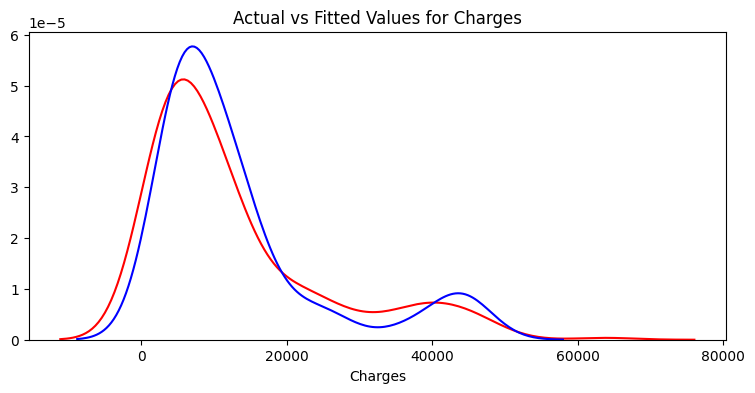

In [190]:
# Visualising the Random Forest Regressor results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

In [191]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predicted2.head()

,Actual,Predicted
764,9095.06825,9955.593099
887,5272.17580,6137.453603
890,29330.98315,27417.240501
1293,9301.89355,10056.945239
259,33750.29180,35471.595532


# Importance_Features

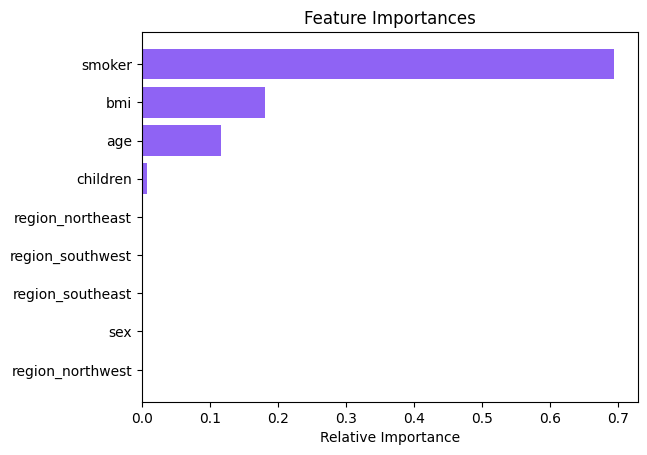

In [192]:
features = x.columns
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)



plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that the smoker, bmi and age are more important features compared to the other features.

In [193]:
#We select the import features
x = data.drop(['charges', 'region_northeast','region_northwest','region_southeast','region_southwest', 'sex'], axis = 1)
y = data['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [194]:
x

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


In [195]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(x_train,y_train) #fit - all magic
print(linear_model.predict(x_test))     #predict
print(y_test)

[11461.21778356  9920.2467051  37782.65091804 15948.07879991
  6880.17953405  3611.72298504  1116.03761213 14050.36635496
  8755.91494642  7245.24400051  4141.88989561 10105.75686073
  9070.28895257  4297.76835129 27698.89042419 11158.3034547
 11185.20391622  5566.17742364  8020.78118255 26614.64277528
 33491.40334294 14072.29016492 11247.08992767 32583.50484706
  4526.13824173  8649.40532691   772.16553719 10160.3849297
  4246.31063366 10201.54588088  8778.51695222 40341.14720167
 15888.84361834 14071.98150805 24375.43626726  4693.49482979
 12917.26831998 30917.29783745 33245.25708334  3865.50438555
  3634.32499084  4441.72956167 30088.45417165 39174.930838
 28081.31611876  4782.78344047 11052.499178    7665.89830648
  3205.13568791 10741.82476894  5132.18752728  3180.44587201
 33323.52723342 37851.13513126 16314.94956658  6589.79766046
  6075.04545851  9305.5830854   9388.16042203 11615.74961081
  2135.68543386 38675.99872249 15295.0821884  12055.12050413
 13472.32721915 14188.003214

In [196]:
linear_model.score(x_test, y_test)

0.7978274606303823

In [197]:
y_pred2 = linear_model.predict(x_test)

<ipython-input-198-9dd94f012e77>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-198-9dd94f012e77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , 

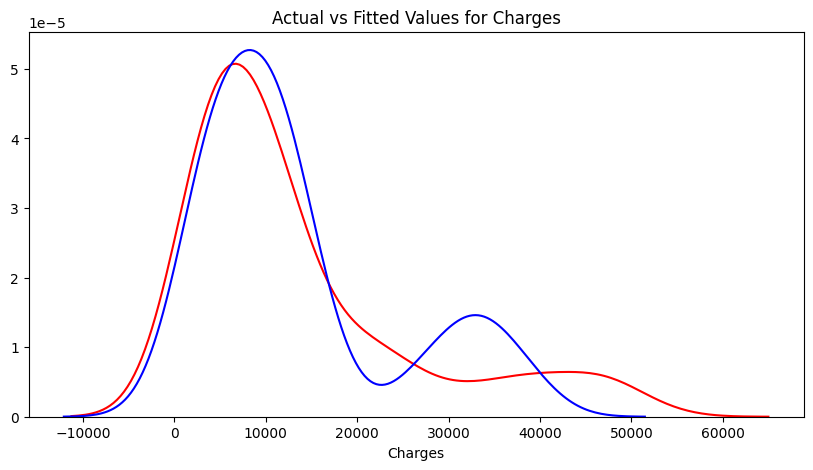

In [198]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

# Model Evaluation

In [199]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [200]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 11481.750688123233
Mean Square Error: 266734832.03945723
Root Mean Square Error: 16332.018614961753


In [201]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 3941.069397763099
Mean Square Error: 32171708.572455727
Root Mean Square Error: 5672.01098134125


# Key Insights
Feature Importance: After analyzing the dataset, we found that the most influential factors affecting medical insurance charges are whether the person is a smoker, their BMI (Body Mass Index), and their age.

Smoking Impact: Smokers tend to have significantly higher medical insurance charges compared to non-smokers. This is a crucial insight that highlights the importance of lifestyle choices on healthcare costs.

Age and Charges: The age of an individual is positively correlated with insurance charges. Older individuals tend to have higher medical costs, which is understandable given the increased likelihood of health issues as age advances.

BMI Influence: Higher BMI values are associated with increased medical insurance charges. This suggests that maintaining a healthy weight can positively impact healthcare costs.

Model Performance: We evaluated multiple regression models including Multiple Linear Regression, LassoCV, RidgeCV, ElasticNet, Random Forest Regressor, and Polynomial Regression. Among these, Polynomial Regression and Random Forest Regressor showed better performance in predicting medical insurance charges.

Polynomial Model Advantage: The Polynomial Regression model showed the lowest Mean Absolute Error, Mean Square Error, and Root Mean Square Error among all models, indicating its capability to better capture the underlying patterns in the data.

# Conclusion
This project demonstrates the process of predicting medical health insurance costs using various regression models. The models' performances are compared using evaluation metrics, and key insights are drawn from the analysis. The project highlights the importance of data preprocessing, model selection, and evaluation for accurate predictions in the field of medical insurance cost estimation. Further improvements and refinements could be explored to enhance the models' predictive capabilities.